# Assignment -EDA2

### Import Libraries

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [ ]:
df= pd.read_csv("/content/adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### EDA and Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Checking for Null Values

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:


# Check for missing values
missing_values = df.isnull().sum()

# Drop columns with high missing values
df = df.dropna(axis=1, thresh=0.7 * df.shape[0])

# Impute missing values in remaining columns with the median
for column in df.columns:
  if df[column].isnull().any():
    df[column] = df[column].fillna(df[column].median())

# Verify that there are no missing values left
df.isnull().sum().sum()


0

In [ ]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


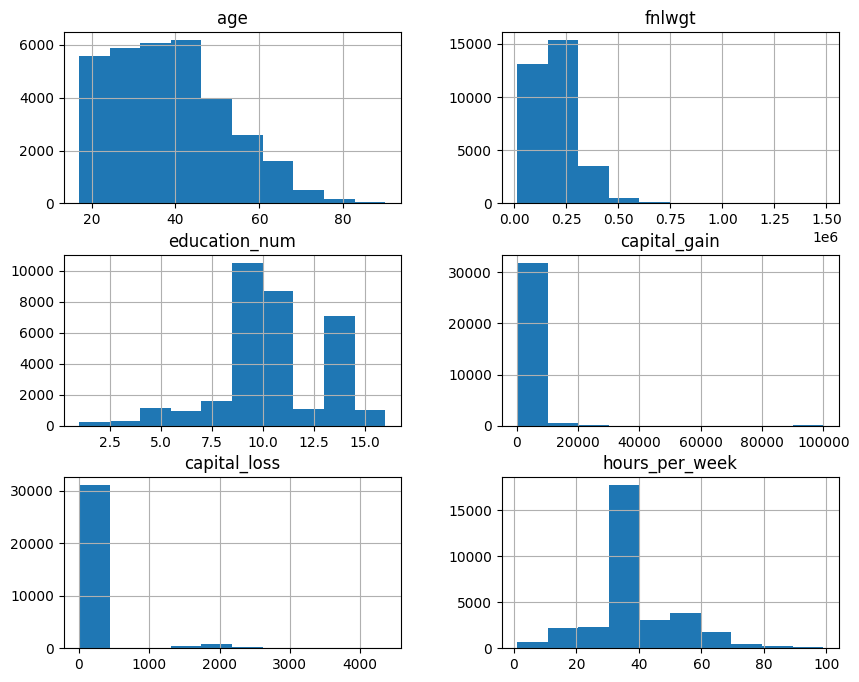

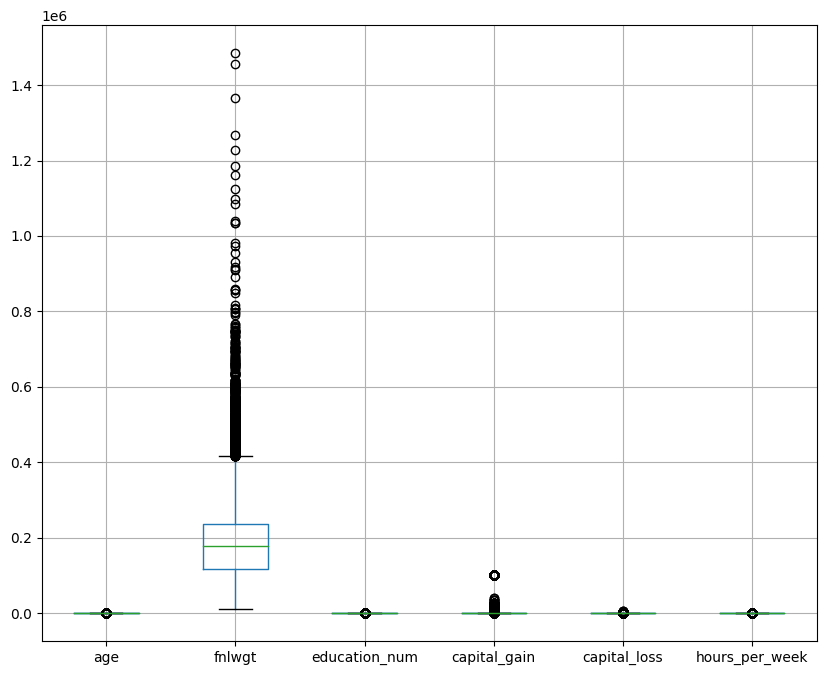

In [ ]:

# Create histograms for numerical variables
df.hist(figsize=(10, 8), bins=10)
plt.show()

# Create boxplots for numerical variables
df.boxplot(figsize=(10, 8))
plt.show()

In [ ]:


# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))


In [ ]:


# Identify categorical variables with less than 5 categories
categorical_cols = df.select_dtypes(include='object').columns
low_cardinality_cols = [cname for cname in categorical_cols if df[cname].nunique() < 5]

# Perform one-hot encoding on low cardinality categorical variables
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols)

df_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,False,True,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,False,True,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,False,True,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,False,True,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,True,False,True,False


In [ ]:


from sklearn.preprocessing import LabelEncoder

# Identify categorical variables with more than 5 categories
high_cardinality_cols = [cname for cname in categorical_cols if df[cname].nunique() > 5]

# Perform label encoding on high cardinality categorical variables
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
  df_encoded[col] = label_encoder.fit_transform(df[col])

df_encoded.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,White,2174,0,40,39,False,True,True,False
1,50,6,83311,9,13,2,4,0,White,0,0,13,39,False,True,True,False
2,38,4,215646,11,9,0,6,1,White,0,0,40,39,False,True,True,False
3,53,4,234721,1,7,2,6,0,Black,0,0,40,39,False,True,True,False
4,28,4,338409,9,13,2,10,5,Black,0,0,40,5,True,False,True,False


####	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

One-Hot Encoding:

Pros:

Maintains independence between categories.
Preserves all information about categories.
Suitable for non-ordinal categorical variables.

Cons:

Increases dimensionality significantly.
Leads to sparsity in large datasets.
Introduces multicollinearity.

Label Encoding:

Pros:

Reduces dimensionality.
Preserves order for ordinal data.

Cons:

Assumes ordinality, which may not always be true.
Can imply misleading magnitude.
Sensitivity to initialization.

In [29]:


# Identify skewed numerical features
skewed_features = df.select_dtypes(include=['float64', 'int64']).skew() > 0.75

# Apply log transformation to skewed features
for feature in skewed_features.index:
  if skewed_features[feature]:
    df[feature] = np.log(df[feature] + 1)


In [44]:


from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, contamination='auto')
model.fit(df)

outlier_index=model.predict(df)

df_without_outliers=df[outlier_index==1]


In [45]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,11.258253,13,7.684784,0.0,40
1,50,11.330348,13,0.000000,0.0,13
2,38,12.281398,9,0.000000,0.0,40
3,53,12.366157,7,0.000000,0.0,40
4,28,12.732013,13,0.000000,0.0,40


#### Discuss how outliers can affect model performance.

Outliers can negatively impact model performance by skewing statistical measures, reducing model robustness, and increasing prediction errors. However, they can also offer valuable insights in some cases. Strategies to mitigate their effects include outlier detection and removal, data transformations, and using robust algorithms.

In [50]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Select features using the PPS method
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(df, df['capital_gain'])

# Get the scores for each feature
scores = selector.scores_

# Create a DataFrame with feature names and scores
features_scores = pd.DataFrame({'Feature': df.columns, 'Score': scores})

# Sort the features by their scores
features_scores = features_scores.sort_values(by='Score', ascending=False)

# Print the top 5 features
print(features_scores.head(5))



          Feature         Score
3    capital_gain  4.312726e+18
2   education_num  5.521555e+02
0             age  5.099723e+02
5  hours_per_week  2.303751e+02
4    capital_loss  1.431474e+02


#### Discuss the relationships between the top features and the target variable


 -If the top feature is "income", it might suggest that income is a strong predictor of the target variable.
 -If two features are highly correlated, it might suggest that they capture similar information and one of them could be removed.

